# Titanic Practice 1

References: https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner


### 1. Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import rcParams
from pathlib import Path

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### 2. Data Download

In [3]:
data_dir = Path('../../dacon-inputs/titanic/input')
sub_dir = Path('../../dacon-inputs/titanic/sub')
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
sample_file = data_dir / 'submission.csv'
seed = 42

In [4]:
data_dir.resolve()

WindowsPath('C:/Users/bryan/dacon-inputs/titanic/input')

### 3. EDA

#### Load Training Data

In [42]:
trn = pd.read_csv(trn_file, index_col=0)
tst = pd.read_csv(tst_file, index_col=0)
print(trn.shape)
trn.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
trn.describe(include="all") # include="all" shows non-numerical data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### EDA

- Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
- Categorical Features: Survived(0/1), Sex(male/female), Embarked(C/Q/S), Pclass(1/2/3)
- Alphanumeric Features: Ticket, Cabin
- Individual Features: Name

In [7]:
trn.info()  # Checking for NaN values: Age, Cabin, Embarked have NaN values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Data Visualization

 - Sex Feature

Percentage of males who survived: 18.890814558058924
Percentage of females who survived: 74.20382165605095
Among survivors, percentage of males:  31.871345029239766
Among survivors, percentage of females:  68.12865497076024


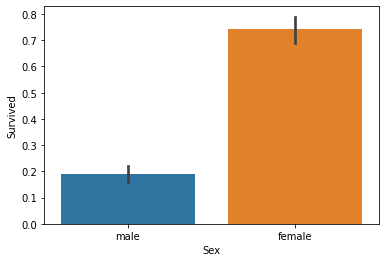

In [38]:
# survival vs sex
sns.barplot(x="Sex", y="Survived", data=trn)

# percentages of males vs. females that survive
print("Percentage of males who survived:", trn["Survived"][trn["Sex"] == 'male'].value_counts(normalize = True)[1]*100)
print("Percentage of females who survived:", trn["Survived"][trn["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Among survivors, percentage of males: ", trn["Sex"][trn["Survived"]==1].value_counts(normalize = True)["male"]*100)
print("Among survivors, percentage of females: ", trn["Sex"][trn["Survived"]==1].value_counts(normalize = True)["female"]*100)

 - Pclass Feature

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


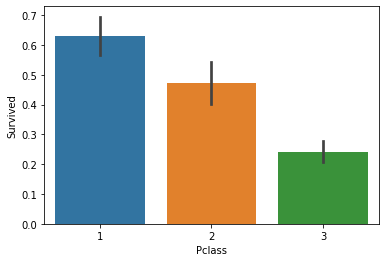

In [40]:
# survival vs Pclass
sns.barplot(x="Pclass", y="Survived", data=trn)

# percentages of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", trn["Survived"][trn["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived:", trn["Survived"][trn["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived:", trn["Survived"][trn["Pclass"] == 3].value_counts(normalize = True)[1]*100)

 - Age Feature

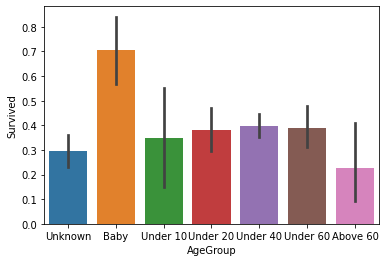

In [50]:
# sort the ages into categories
trn["Age"] = trn["Age"].fillna(-0.5)
tst["Age"] = tst["Age"].fillna(-0.5)
bins = [-1, 0, 5, 10, 20, 40, 60, np.inf]
labels = ['Unknown', 'Baby', 'Under 10', 'Under 20', 'Under 40', 'Under 60', 'Above 60']
trn['AgeGroup'] = pd.cut(trn["Age"], bins, labels = labels)
tst['AgeGroup'] = pd.cut(tst["Age"], bins, labels = labels)

# Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=trn)
plt.show()

 - Cabin Feature

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


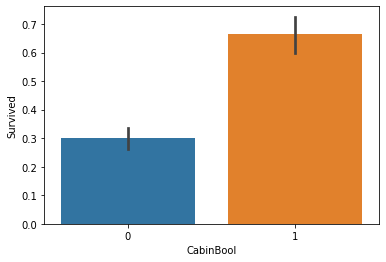

In [51]:
trn["CabinBool"] = (trn["Cabin"].notnull().astype('int'))
tst["CabinBool"] = (tst["Cabin"].notnull().astype('int'))

# percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", trn["Survived"][trn["CabinBool"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of CabinBool = 0 who survived:", trn["Survived"][trn["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

# CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=trn)
plt.show()

People w/ recorded cabin number = more likely to survive?

### 4. Feature File Creation

Cleaning data, leaving only the features we want

In [52]:
feature_dir = Path('../../dacon-inputs/titanic/feature')
feature_file = feature_dir / 'features_p1.csv'

#### Observing Test Data

In [56]:
print("trn shape:", trn.shape)
print("tst shape:", tst.shape)
tst.head()

trn shape: (891, 13)
tst shape: (418, 12)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Under 40,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Under 60,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Above 60,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Under 40,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Under 40,0


#### Combining Train/Test Data

In [57]:
df = pd.concat([trn, tst], axis=0)
print(df.shape)
df.tail()

(1309, 13)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
PassengerId,,,,,,,,,,,,,
1305,NaN,3,"Spector, Mr. Woolf",male,-0.5,0,0,A.5. 3236,8.0500,NaN,S,Unknown,0
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Under 40,1
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Under 40,0
1308,NaN,3,"Ware, Mr. Frederick",male,-0.5,0,0,359309,8.0500,NaN,S,Unknown,0
1309,NaN,3,"Peter, Master. Michael J",male,-0.5,1,1,2668,22.3583,NaN,C,Unknown,0


#### Feature Deletion

In [64]:
df.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'AgeGroup'], axis=1, inplace=True)
print(df.shape)
df.head()

(1309, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool
PassengerId,,,,,,,,
1,0.0,3,male,22.0,1,0,7.2500,0
2,1.0,1,female,38.0,1,0,71.2833,1
3,1.0,3,female,26.0,0,0,7.9250,0
4,1.0,1,female,35.0,1,0,53.1000,1
5,0.0,3,male,35.0,0,0,8.0500,0


#### Feature Edit

- Sex Feature

In [65]:
# map each Sex value to a numerical value

sex_mapping = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(sex_mapping)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool
PassengerId,,,,,,,,
1,0.0,3,0,22.0,1,0,7.2500,0
2,1.0,1,1,38.0,1,0,71.2833,1
3,1.0,3,1,26.0,0,0,7.9250,0
4,1.0,1,1,35.0,1,0,53.1000,1
5,0.0,3,0,35.0,0,0,8.0500,0


- Fare Feature

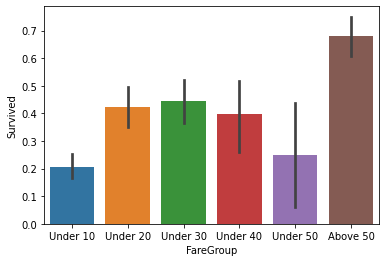

In [71]:
# fare feature visualization

bins = [0, 10, 20, 30, 40, 50, np.inf]
labels = ['Under 10', 'Under 20', 'Under 30', 'Under 40', 'Under 50', 'Above 50']
df['FareGroup'] = pd.cut(df["Fare"], bins, labels = labels)

# fare vs. survival
sns.barplot(x="FareGroup", y="Survived", data=df)
plt.show()

df.drop(['FareGroup'], axis=1, inplace=True)

In [101]:
df.info()

# fill in missing Fare value in test set based on mean fare for that Pclass
for x in range(len(df["Fare"])):
    if pd.isnull(df["Fare"][x+1]): # x+1 b/c passenger id is 1~1309, while range is 0~1308
        pclass = df["Pclass"][x] #Pclass = 3
        df["Fare"][x] = round(df[df["Pclass"] == pclass]["Fare"].mean(), 4)
        print("Pclass: ", pclass, ", Fare: ", df["Fare"][x])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    float64
 1   Pclass     1309 non-null   int64  
 2   Sex        1309 non-null   int64  
 3   Age        1309 non-null   float64
 4   SibSp      1309 non-null   int64  
 5   Parch      1309 non-null   int64  
 6   Fare       1308 non-null   float64
 7   CabinBool  1309 non-null   int32  
dtypes: float64(3), int32(1), int64(4)
memory usage: 119.2 KB
Pclass:  3 , Fare:  13.3029


#### Checking Features

In [106]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool
PassengerId,,,,,,,,
1,0.0,3,0,22.0,1,0,7.2500,0
2,1.0,1,1,38.0,1,0,71.2833,1
3,1.0,3,1,26.0,0,0,7.9250,0
4,1.0,1,1,35.0,1,0,53.1000,1
5,0.0,3,0,35.0,0,0,8.0500,0


#### Saving Feature File

In [107]:
# Save Feature File
df.to_csv(feature_file)

# Confirmation
feature = pd.read_csv(feature_file, index_col=0)
print(feature.shape)
feature.head()

(1309, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool
PassengerId,,,,,,,,
1,0.0,3,0,22.0,1,0,7.2500,0
2,1.0,1,1,38.0,1,0,71.2833,1
3,1.0,3,1,26.0,0,0,7.9250,0
4,1.0,1,1,35.0,1,0,53.1000,1
5,0.0,3,0,35.0,0,0,8.0500,0
